# using a 16bit ADC 2^16 = 65536
ie 3volts/65536 = 0.0457763671875mV per step resolution 
ADC Module used: https://cdn-learn.adafruit.com/downloads/pdf/adafruit-4-channel-adc-breakouts.pdf?timestamp=1632809212

In [6]:
VDD = 3
bits = 16
step_size = VDD/2**bits
print("absolute step size = ", step_size)
accurate_bits = 13
step_size_practical = VDD/2**accurate_bits
print("accurate step size = ", step_size_practical)

absolute step size =  4.57763671875e-05
accurate step size =  0.0003662109375


We need to calibrate sensors based on a known input vector X (ADC reading) to output vector Y Force Reading kg, pounds or newtons. (we could start with pounds if using known mass or Newtons if we use the strain gague.)

(11, 1)
(11,)
-3.311148086522463 [0.01663894]


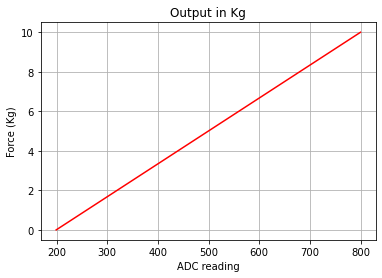

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr


X = np.linspace(199,800,11).reshape(-1,1)
Y = np.array([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
print(X.shape)
print(Y.shape)
model = lr()
model.fit(X,Y)
plt.plot(X,model.predict(X) ,'r') 
plt.title("Output in Kg") #our model will not be linear
plt.grid()
plt.ylabel("Force (Kg)")
plt.xlabel("ADC reading")
print (model.intercept_, model.coef_) 


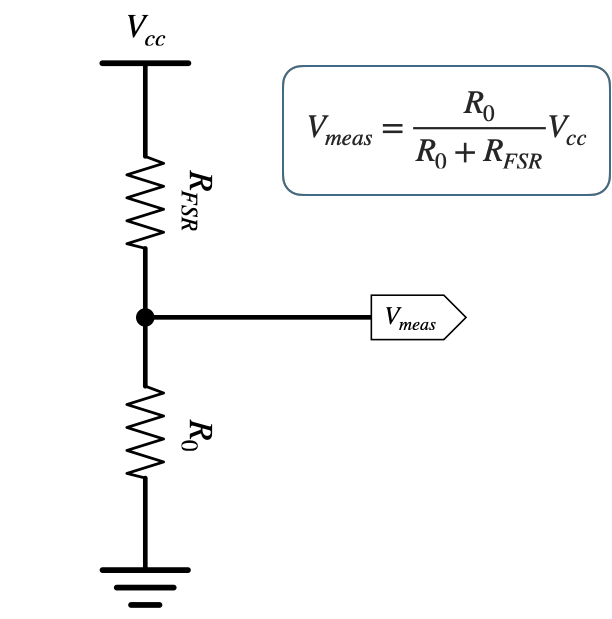

(10, 1)
(10, 1)
[-2.21314498e+21] [[5.87431354e+18]]


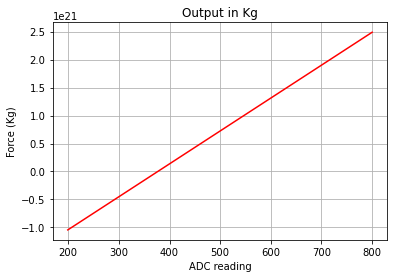

In [57]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr


X = np.linspace(199.1,800.2,10).reshape(-1,1)

Y = np.array([1.1,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]).reshape(-1,1)
Y = Y*np.exp(X*.06)
print(X.shape)
print(Y.shape)
model = lr()
model.fit(X,Y)
plt.plot(X,model.predict(X) ,'r') 
plt.title("Output in Kg") #our model will not be linear
plt.grid()
plt.ylabel("Force (Kg)")
plt.xlabel("ADC reading")
print (model.intercept_, model.coef_) 
#